# Setup

In [77]:
from Bio import SeqIO, AlignIO, Phylo
from Bio.Align.Applications import MafftCommandline
import subprocess
import matplotlib.pyplot as plt
import glob as glob

# Read in unaligned FASTA

In [62]:
records = list(SeqIO.parse("sequences.fasta", "fasta"))
print(f"Loaded {len(records)} sequences.")

Loaded 30 sequences.


# Align with MAFFT

In [63]:
mafft = MafftCommandline(input="sequences.fasta", thread=4)
stdout, _ = mafft()
with open("sequences.aln.fasta", "w") as f:
    f.write(stdout)
print("Alignment saved to sequences.aln.fasta")

Alignment saved to sequences.aln.fasta


# Infer ML tree

In [64]:
cmd = [
    "iqtree2",
    "-s", "sequences.aln.fasta",
    "-m", "GTR+G",
    "-nt", "AUTO",
    "-bb", "1000",
    "-alrt", "1000",
    "-pre", "sequences.bootstrap"
]

result = subprocess.run(cmd, capture_output=True, text=True)
print(result.stdout)
print(result.stderr)


Checkpoint (sequences.bootstrap.ckp.gz) indicates that a previous run successfully finished
Use `-redo` option if you really want to redo the analysis and overwrite all output files.
Use `--redo-tree` option if you want to restore ModelFinder and only redo tree search.
Use `--undo` option if you want to continue previous run when changing/adding options.



# Load and inspect tree

In [80]:
tree = Phylo.read("myrun.treefile", "newick")
print(f"Tree tips (taxa): {len(tree.get_terminals())}")

Tree tips (taxa): 30


# Plot & save the tree

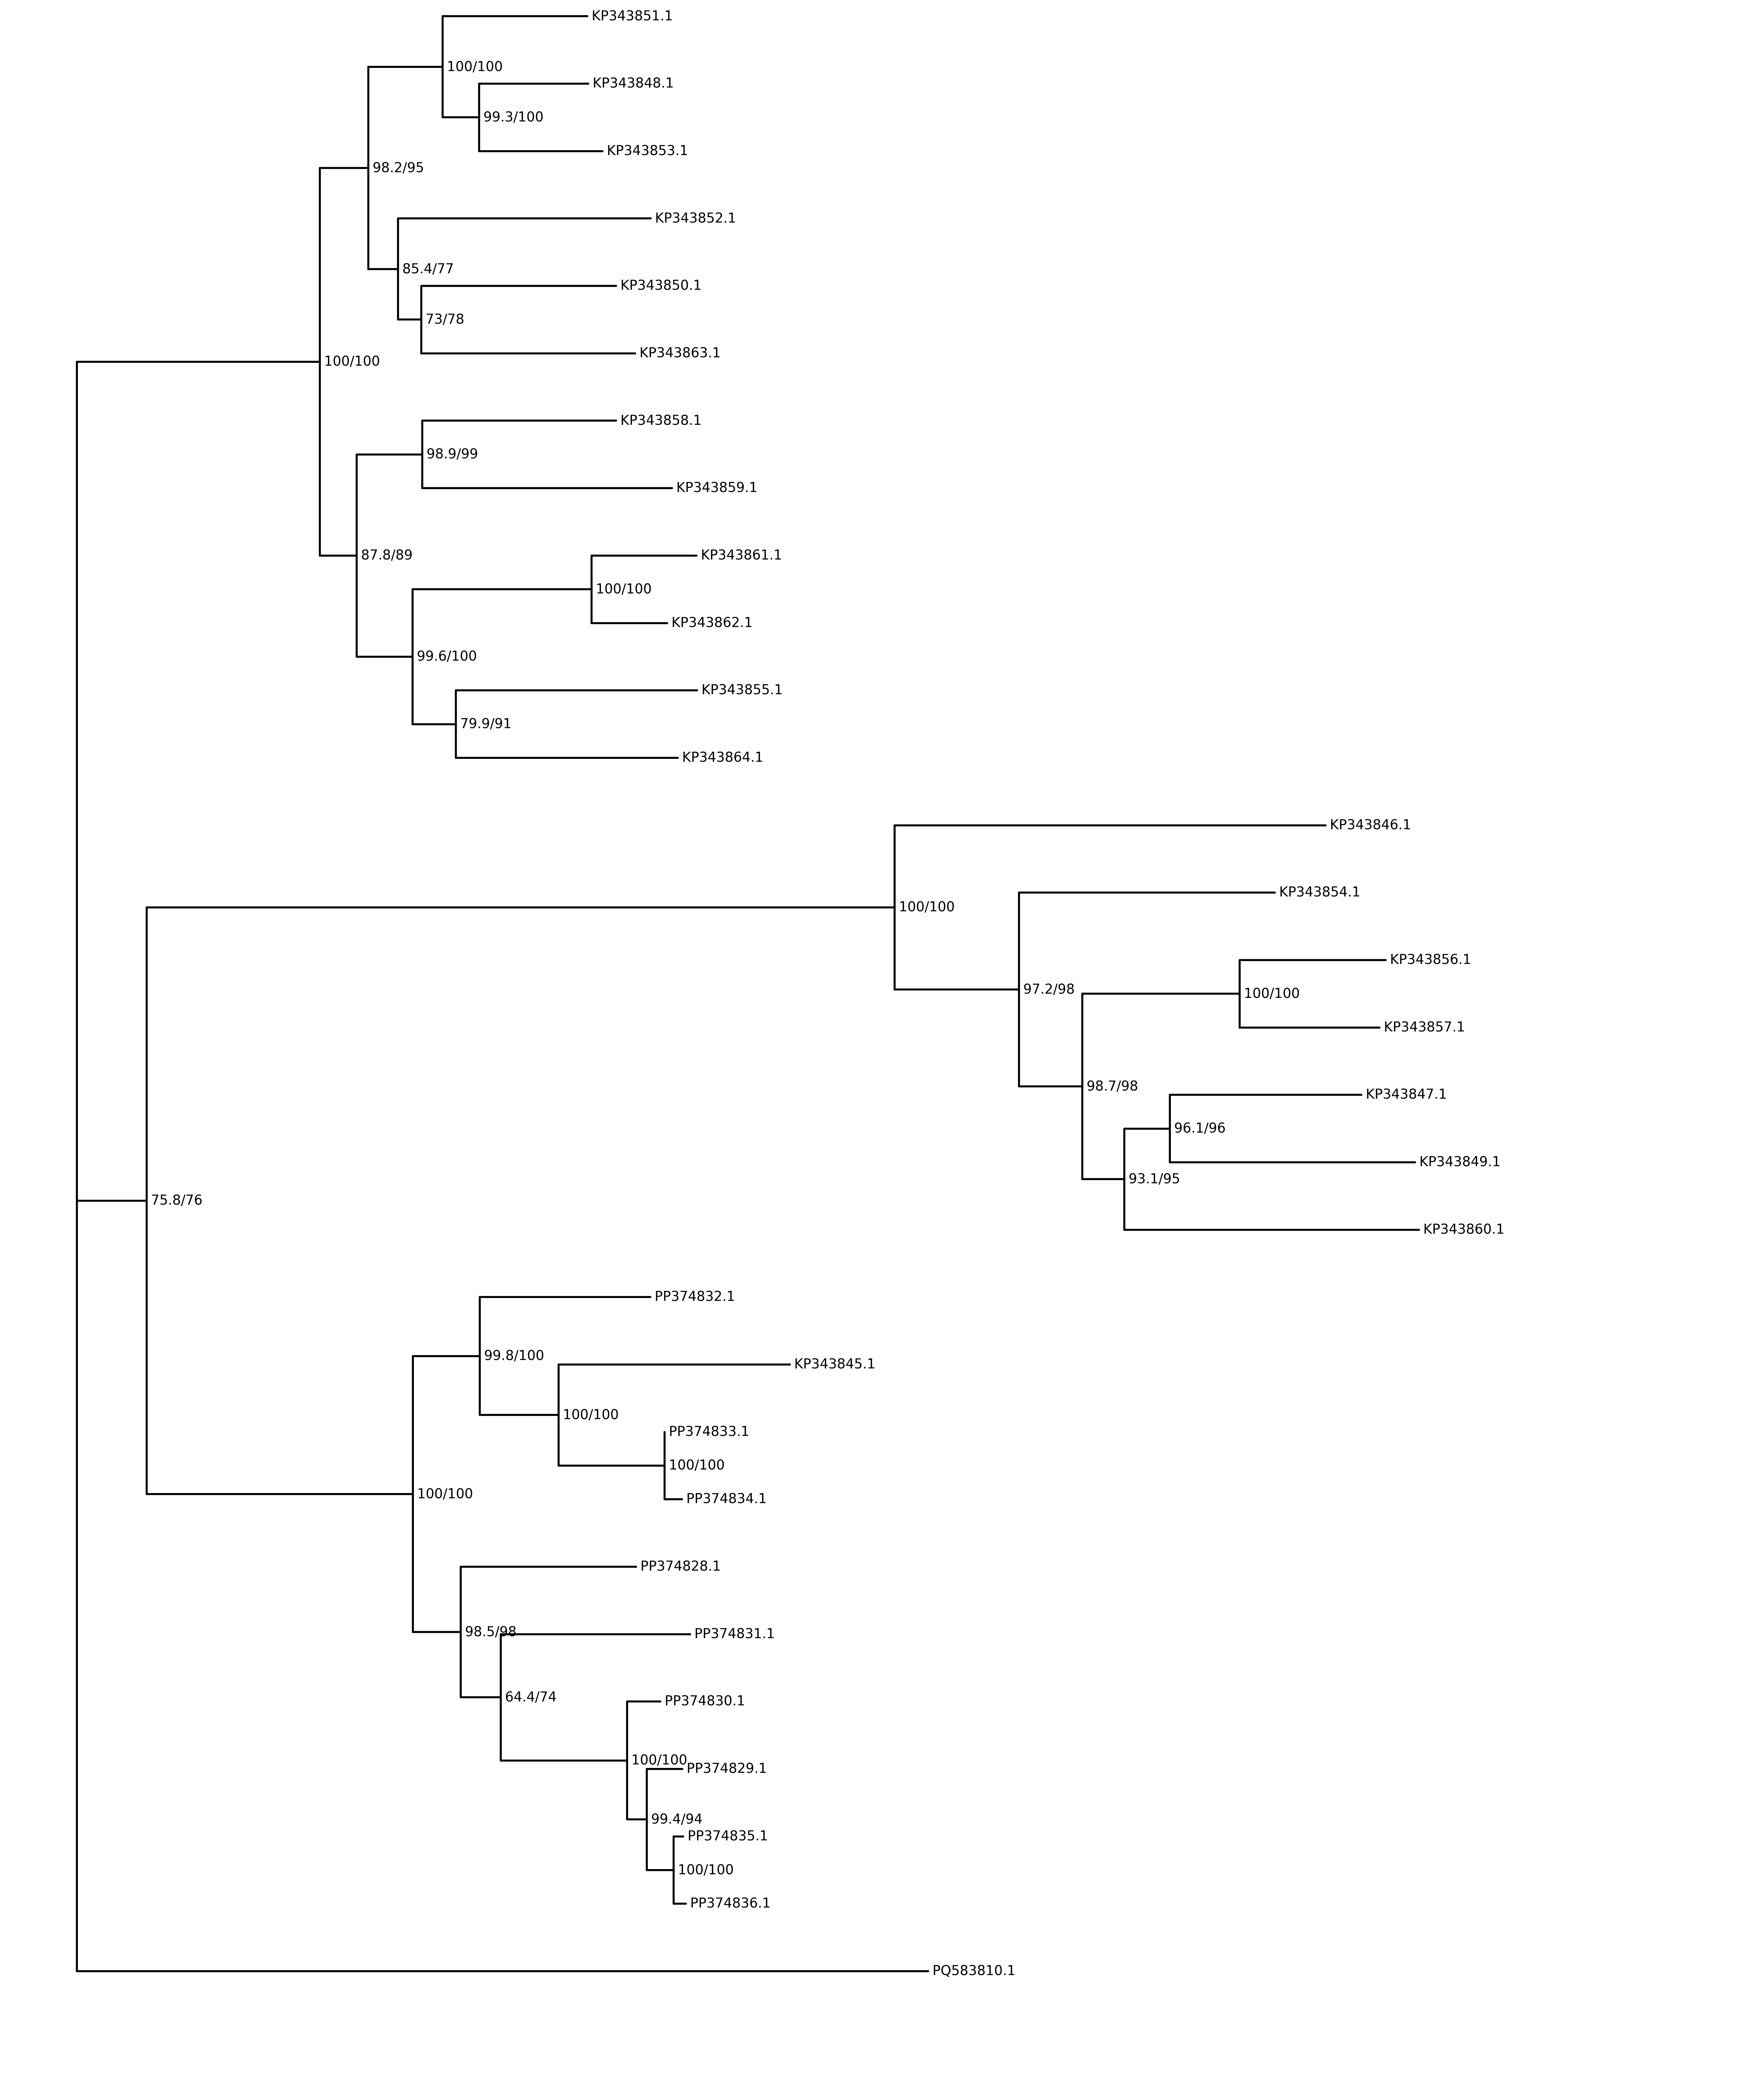

In [123]:
N = len(tree.get_terminals())

fig, ax = plt.subplots(figsize=(20, 25), dpi=300)
Phylo.draw(
    tree,
    label_func=lambda x: x.name,
    branch_labels=lambda c: c.confidence,
    axes=ax,
    do_show=False
)

ax.set_ylim(-0.5, N + 0.05)
plt.subplots_adjust(left=0.05, right=0.95, top=0.95, bottom=0.1)
ax.axis("off")

plt.savefig("myrun_phylogeny_final.png")